<a href="https://colab.research.google.com/github/aditipriya25/DDOS_attack-_classification/blob/main/DL_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv('/content/02-14-2018.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123479,21,6,14/02/2018 11:35:23,17,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,FTP-BruteForce
123480,21,6,14/02/2018 11:35:23,2,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,FTP-BruteForce
123481,21,6,14/02/2018 11:35:23,1,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,FTP-BruteForce
123482,21,6,14/02/2018 11:35:23,1,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,FTP-BruteForce


In [2]:
import sys
import sklearn

In [3]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (123484, 80)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123484 entries, 0 to 123483
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           123484 non-null  int64  
 1   Protocol           123484 non-null  int64  
 2   Timestamp          123484 non-null  object 
 3   Flow Duration      123484 non-null  int64  
 4   Tot Fwd Pkts       123484 non-null  int64  
 5   Tot Bwd Pkts       123484 non-null  int64  
 6   TotLen Fwd Pkts    123484 non-null  int64  
 7   TotLen Bwd Pkts    123484 non-null  int64  
 8   Fwd Pkt Len Max    123484 non-null  int64  
 9   Fwd Pkt Len Min    123484 non-null  int64  
 10  Fwd Pkt Len Mean   123484 non-null  float64
 11  Fwd Pkt Len Std    123484 non-null  float64
 12  Bwd Pkt Len Max    123484 non-null  int64  
 13  Bwd Pkt Len Min    123484 non-null  int64  
 14  Bwd Pkt Len Mean   123484 non-null  float64
 15  Bwd Pkt Len Std    123484 non-null  float64
 16  Fl

In [5]:
dropdf= df.dropna()
dropdf.shape

(123479, 80)

In [6]:
dropdf.isna().any()[lambda x:x]

,0


In [19]:
# Instead of using del, use drop to remove columns.
# drop takes a list of columns and the axis to drop from (1 for columns)
dropdf = dropdf.drop(['Flow Byts/s', 'Flow Pkts/s '], axis=1, errors='ignore')

# errors='ignore' will prevent the code from raising a KeyError
# if one of the columns is not found in the DataFrame.

In [20]:
df.iloc[0]

,0
Dst Port,0
Protocol,0
Timestamp,14/02/2018 08:31:01
Flow Duration,112641719
Tot Fwd Pkts,3
...,...
Idle Mean,56320859.5
Idle Std,139.300036
Idle Max,56320958.0
Idle Min,56320761.0


In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)


(98783, 79)
(24696, 79)


In [23]:
print('Label distribution Training set:')
print(df_train['Label'].value_counts()) # Removed leading space from ' Label'
print()
print('Label distribution Test set:')
print(df_test['Label'].value_counts()) # Removed leading space from ' Label'

Label distribution Training set:
Label
FTP-BruteForce    98681
Benign              102
Name: count, dtype: int64

Label distribution Test set:
Label
FTP-BruteForce    24678
Benign               18
Name: count, dtype: int64


In [25]:
# Setting the new value
labeldf = df_train['Label']  # Removed the leading space from ' Label'
print(labeldf)

30639     FTP-BruteForce
79804     FTP-BruteForce
96005     FTP-BruteForce
111382    FTP-BruteForce
25298     FTP-BruteForce
               ...      
26354     FTP-BruteForce
45006     FTP-BruteForce
113410    FTP-BruteForce
7832      FTP-BruteForce
94684     FTP-BruteForce
Name: Label, Length: 98783, dtype: object


In [27]:
labeldf_test = df_test['Label']  # Removed the leading space from ' Label'
print(labeldf_test)
#change the label column

118672    FTP-BruteForce
73335     FTP-BruteForce
21718     FTP-BruteForce
85578     FTP-BruteForce
70776     FTP-BruteForce
               ...      
27727     FTP-BruteForce
11721     FTP-BruteForce
18933     FTP-BruteForce
84686     FTP-BruteForce
26416     FTP-BruteForce
Name: Label, Length: 24696, dtype: object


In [29]:

# Setting the new value
# ... (previous code) ...

labeldf_test = df_test['Label']  # Removed the leading space from ' Label'
print(labeldf_test)
#change the label column
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)

# Create newlabeldf by replacing values in labeldf
newlabeldf = labeldf.replace({ 'BENIGN' : 0, 'DDoS' : 1 }) # This line was missing

df_train[' Label'] = newlabeldf # Now newlabeldf is defined
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)

df_train[' Label'] = newlabeldf
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])

118672    FTP-BruteForce
73335     FTP-BruteForce
21718     FTP-BruteForce
85578     FTP-BruteForce
70776     FTP-BruteForce
               ...      
27727     FTP-BruteForce
11721     FTP-BruteForce
18933     FTP-BruteForce
84686     FTP-BruteForce
26416     FTP-BruteForce
Name: Label, Length: 24696, dtype: object


In [31]:
X_df_train = df_train.drop(' Label', axis=1)
Y_df_train = df_train[' Label']
X_df_test = df_test.drop(' Label', axis=1)
Y_df_test = df_test[' Label']
X_df_train
Y_df_train

,Label
30639,FTP-BruteForce
79804,FTP-BruteForce
96005,FTP-BruteForce
111382,FTP-BruteForce
25298,FTP-BruteForce
...,...
26354,FTP-BruteForce
45006,FTP-BruteForce
113410,FTP-BruteForce
7832,FTP-BruteForce


In [32]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd

In [36]:
import pandas as pd
from sklearn import preprocessing

# ... (your previous code to create X_df_train) ...

# Check the actual column names in the DataFrame
print(X_df_train.columns)  # Print column names for debugging

# Access the column with the correct name, handling potential variations:
timestamp_col = next((col for col in X_df_train.columns if col.strip() == 'Timestamp'), None)

# If the column is found, proceed with the conversion:
if timestamp_col:
    X_df_train[timestamp_col] = pd.to_datetime(X_df_train[timestamp_col])

    # Extract numerical features from the datetime column
    X_df_train['Year'] = X_df_train[timestamp_col].dt.year
    X_df_train['Month'] = X_df_train[timestamp_col].dt.month
    X_df_train['Day'] = X_df_train[timestamp_col].dt.day
    X_df_train['Hour'] = X_df_train[timestamp_col].dt.hour
    X_df_train['Minute'] = X_df_train[timestamp_col].dt.minute
    X_df_train['Second'] = X_df_train[timestamp_col].dt.second

    # Drop the original 'Timestamp' column
    X_df_train = X_df_train.drop(timestamp_col, axis=1)

    # Identify and handle non-numerical columns
    for col in X_df_train.select_dtypes(include=['object']).columns:
        # One-hot encoding for categorical features
        # This creates new columns with binary values for each unique category
        # and drops the original categorical column.
        X_df_train = pd.get_dummies(X_df_train, columns=[col], prefix=[col], drop_first=True)


    # Now you can proceed with scaling:
    scaler1 = preprocessing.StandardScaler().fit(X_df_train)
    X_df_train = scaler1.transform(X_df_train)

else:
    print("Warning: 'Timestamp' column not found in X_df_train")

# ... (apply similar transformations to X_df_test) ...
# test data
# ... (apply the same logic to X_df_test as above) ...

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Se

In [39]:
import pandas as pd
from sklearn import preprocessing

# ... (your previous code to create X_df_train and X_df_test) ...

def preprocess_data(df):
    """Preprocesses a DataFrame by converting 'Timestamp' to numerical features and
    applying one-hot encoding to categorical columns.
    """
    # Check the actual column names in the DataFrame
    print(df.columns)  # Print column names for debugging

    # Access the column with the correct name, handling potential variations:
    # Updated to consider spaces in column names
    timestamp_col = next((col for col in df.columns if col.strip() == 'Timestamp'), None)

    # If the column is found, proceed with the conversion:
    if timestamp_col:
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])

        # Extract numerical features from the datetime column
        df['Year'] = df[timestamp_col].dt.year
        df['Month'] = df[timestamp_col].dt.month
        df['Day'] = df[timestamp_col].dt.day
        df['Hour'] = df[timestamp_col].dt.hour
        df['Minute'] = df[timestamp_col].dt.minute
        df['Second'] = df[timestamp_col].dt.second

        # Drop the original 'Timestamp' column
        df = df.drop(timestamp_col, axis=1)

    else:
        print("Warning: 'Timestamp' column not found in DataFrame")

    # --- The Main Change ---
    # One-hot encoding for all remaining 'object' type columns
    # Iterate through all columns of the DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        # Perform one-hot encoding on the current column
        df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)

    return df

# Preprocess training data
X_df_train = preprocess_data(X_df_train)

# Preprocess test data
X_df_test = preprocess_data(X_df_test)

# Now you can proceed with scaling:
scaler1 = preprocessing.StandardScaler().fit(X_df_train)
X_df_train = scaler1.transform(X_df_train)

scaler2 = preprocessing.StandardScaler().fit(X_df_test)
X_df_test = scaler2.transform(X_df_test)

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Se

In [40]:
print(X_df_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]


In [41]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')
selector=SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train,Y_df_train)
X_newdf_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 32 33 43 45 48 49 50 55 56 57 58 59 60 70 77 78 79] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(98783, 9)

In [51]:
import numpy as np  # Import numpy if not already imported

# ... (your existing code) ...

true = selector.get_support()
newcolindex_DDoS = [i for i, x in enumerate(true) if x]

# Ensure newcolindex_DDoS values are within the bounds of colNames
newcolindex_DDoS = [i for i in newcolindex_DDoS if i < len(colNames)]

newcolname_DDoS = [colNames[i] for i in newcolindex_DDoS]
print(newcolname_DDoS)


['Timestamp', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Std', 'RST Flag Cnt', 'ECE Flag Cnt', 'Subflow Bwd Byts', 'Fwd Act Data Pkts']


In [52]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: ['Timestamp', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Std', 'RST Flag Cnt', 'ECE Flag Cnt', 'Subflow Bwd Byts', 'Fwd Act Data Pkts']


In [53]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_df_train) '''

'from sklearn import preprocessing\nfrom sklearn import utils\n\nlab_enc = preprocessing.LabelEncoder()\nencoded = lab_enc.fit_transform(Y_df_train) '

In [55]:
from sklearn import preprocessing

# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to your training data and transform it
Y_df_train = le.fit_transform(Y_df_train)

In [56]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(2, 'Fwd Act Data Pkts'), (3, 'Subflow Bwd Byts'), (4, 'ECE Flag Cnt'), (5, 'RST Flag Cnt'), (6, 'Fwd IAT Std'), (7, 'Flow IAT Min'), (8, 'Flow IAT Std'), (9, 'Timestamp')]


In [58]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train, Y_df_train)
X_rfeDDoS=rfe.transform(X_df_train)
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
# Ensure that the indices in rfecolindex_DDoS are within the bounds of colNames
rfecolname_DDoS = [colNames[i] for i in rfecolindex_DDoS if i < len(colNames)]
# The above line filters the indices and ensures they are valid for colNames
# You can alternatively print rfecolindex_DDoS to see the list of indices and debug further
print(rfecolindex_DDoS)

[76, 77, 78, 79, 80, 81, 82, 83]


In [59]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: ['Idle Max', 'Idle Min', 'Label']


In [60]:
print(X_rfeDDoS.shape)

(98783, 8)


In [61]:
# all features
clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [62]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [63]:
Y_df_train_pred=clf_DDoS.predict(X_df_test)
# Create confusion matrix
pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
Benign,18,0
FTP-BruteForce,0,24678


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 1.00000 (+/- 0.00000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

Precision: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

Recall: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

F-measure: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(


In [65]:
from sklearn.model_selection import cross_val_score

# Define the metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dictionary to store results
scores = {}

# Loop over the metrics and calculate cross-validated scores
for metric in scoring_metrics:
    score = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring=metric)
    scores[metric] = score
    print(f"{metric.capitalize()}: %0.5f (+/- %0.5f)" % (score.mean(), score.std() * 2))

# If you want to access the individual scores, they are stored in `scores` dictionary


Accuracy: 1.00000 (+/- 0.00000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

Precision: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

Recall: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score o

F1: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'FTP-BruteForce']

  warnings.warn(


In [66]:
pip install seaborn

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
newcolname_DDoS

['Timestamp',
 'Flow IAT Std',
 'Flow IAT Min',
 'Fwd IAT Std',
 'RST Flag Cnt',
 'ECE Flag Cnt',
 'Subflow Bwd Byts',
 'Fwd Act Data Pkts']

In [69]:
x=newcolname_DDoS[1]
y=newcolname_DDoS[3]

In [70]:
df_2 =df_test.iloc[:1000]
df_2

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
118672,21,6,14/02/2018 11:32:58,3,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
73335,21,6,14/02/2018 11:10:12,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
21718,21,6,14/02/2018 10:44:17,19,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
85578,21,6,14/02/2018 11:16:21,2,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
70776,21,6,14/02/2018 11:08:55,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111039,21,6,14/02/2018 11:29:08,3,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
58096,21,6,14/02/2018 11:02:33,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
48827,21,6,14/02/2018 10:57:54,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce
83708,21,6,14/02/2018 11:15:25,2,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,FTP-BruteForce


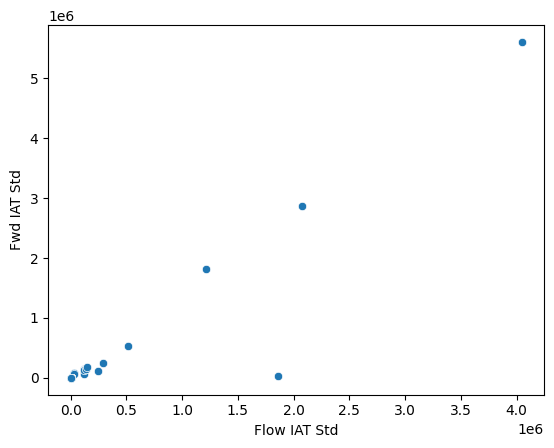

<Figure size 640x480 with 0 Axes>

In [71]:
sns.scatterplot(data = df, x = x, y = y)
plt.show()
plt.savefig('Visualize-DestinationvsBwdPacketLength.jpg')